In [23]:
import numpy as np

In [24]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature          # Index of feature to split on
        self.threshold = threshold      # Threshold value for the feature
        self.left = left                # Left subtree
        self.right = right              # Right subtree
        self.value = value

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria case where we have reached the maximum depth or the number of samples is less than the minimum samples split
        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1 or n_samples < self.min_samples_split:
            return Node(value=np.mean(y))
        
        # Find the best split feature and threshold
        best_feature, best_threshold = self._best_split(X, y)

        if best_feature is None:
            return Node(value=np.mean(y))
        
        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices

        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def _calculate_mse(self, y_left, y_right):
        #left denotes our points left of the threshold and right denotes our points right of the threshold
        #threshold is the value of the feature we are splitting on
        mse_left = np.mean((y_left - np.mean(y_left))**2)
        mse_right = np.mean((y_right - np.mean(y_right))**2)
        mse = mse_left + mse_right
        return mse
    
    def _best_split(self, X, y):
        n_samples, n_features = X.shape
        best_mse = float('inf')
        best_feature = None
        best_threshold = None
       #Iterate through each feature and each threshold to find the best split
        for feature in range(n_features):
            #Get unique values of the feature to use as thresholds
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                y_left = y[left_indices]
                y_right = y[~left_indices]
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                #Calculate the mean squared error of the split
                mse = self._calculate_mse(y_left, y_right)
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold
    
    def predict(self, X):
        return np.array([self._predict_single(x, self.root) for x in X])
    
    def _predict_single(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] < node.threshold:
            return self._predict_single(x, node.left)
        else:
            return self._predict_single(x, node.right)
    



Testing our Decision Tree Model

In [25]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression, make_blobs
import matplotlib.pyplot as plt

In [80]:
X, y = make_blobs(n_samples=1000, centers=5, random_state=42)

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

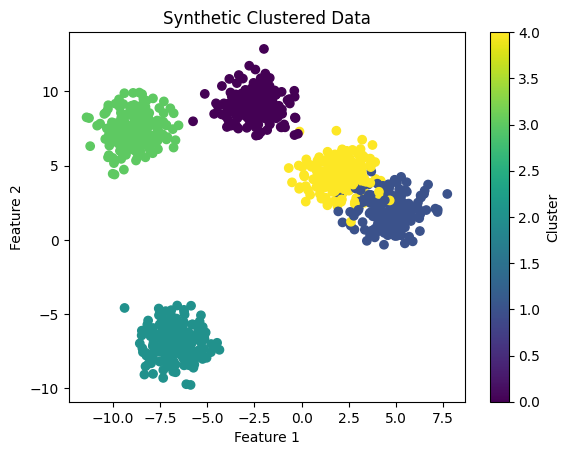

In [81]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Synthetic Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [82]:
deciTree = DecisionTree(max_depth=30, min_samples_split=1)
deciTree.fit(X_train, y_train)

In [83]:
predictions = deciTree.predict(X_test)

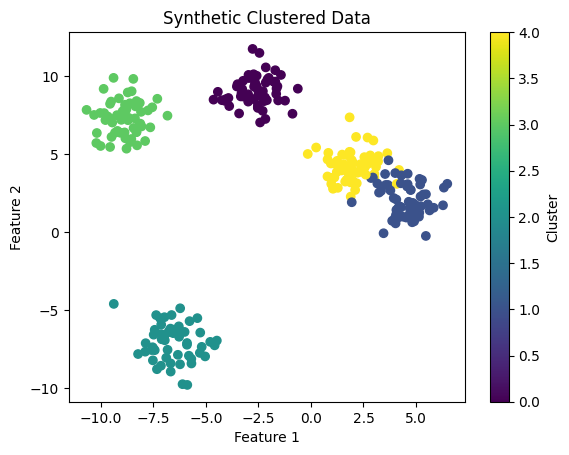

In [84]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.title('Synthetic Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

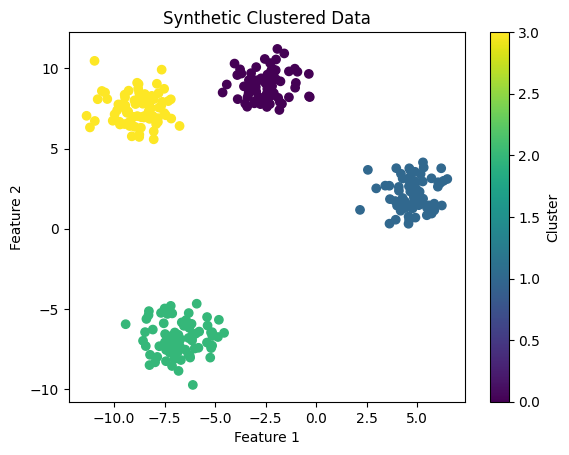

In [79]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis')
plt.title('Synthetic Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()